/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


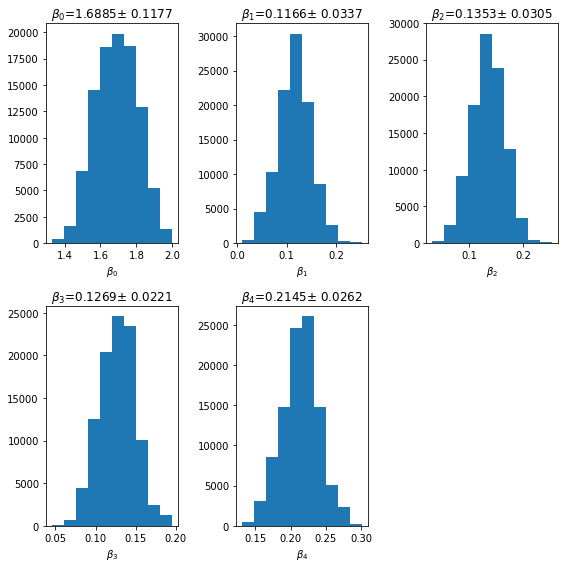

In [95]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("Datos/notas_andes.dat", skiprows=1)
def model(x, betas):
    y = betas[0] + betas[1]*x[:,0] + betas[2]*x[:,1] + betas[3]*x[:,2] + betas[4]*x[:,3]
    return y
sigma = 0.1
def like(x, y, sigma, betas):
    a = (-1/(2 * sigma**2))*np.sum((y - model(x, betas))**2)
    return a
def metropolis(N):
    Y = data[:,4]
    X = data[:,:4]
    betas = np.zeros(5)
    p = like(X, Y, sigma, betas)
    new_betas = np.zeros((N, 5))
    for i in range(N):
        betas_n = betas + np.random.normal(0, 0.05, 5)
        p_n = like(X, Y, sigma, betas_n)
        u = np.random.rand()
        if u < min(1, np.exp(p_n - p)):
            p = p_n
            betas = betas_n
        new_betas[i] = betas
    return np.array(new_betas)
N = 200000
betas = metropolis(N)

plt.figure(figsize=(8,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.hist(betas[int(N/2):int(N),i])
    plt.title(r'$\beta_%1.0f $='%i+'%0.4f' %np.mean(betas[int(N/2):int(N),i]) + r'$\pm$ %0.4f' %np.std(betas[int(N/2):int(N),i]))
    plt.xlabel(r'$\beta_%1.0f $'%i)
    plt.tight_layout()
#plt.savefig('ajuste_bayes_mcmc.png')
plt.show()

In [94]:
betas = metropolis(N)
betas[:10,:]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.03581809,  0.07480953,  0.06199558,  0.02138455, -0.03599622],
       [-0.05432846,  0.09490826,  0.1338108 ,  0.00063565,  0.03477325],
       [-0.06373639,  0.15936929,  0.23618631,  0.06346727, -0.01977144],
       [-0.01931386,  0.12814162,  0.25345858,  0.13487239,  0.0263033 ],
       [-0.07764017,  0.16570188,  0.30452038,  0.12695798,  0.02430225],
       [-0.09188582,  0.15166192,  0.37995265,  0.1895385 ,  0.08301571],
       [-0.02280124,  0.15390087,  0.4236477 ,  0.12202571,  0.13426063],
       [ 0.05024334,  0.15997529,  0.53058664,  0.15097321,  0.19941644]])